In [1]:
import pytearcat as pt
import sympy as sp
t,x,y,z = pt.coords('t,x,y,z')
A = pt.fun('A','t')
g = pt.metric('ds2 = dt**2 - A**2*dx**2 - A**2*dy**2 - A**2*dz**2')

Remember that the time coordinate must be the first coordinate.

Dimension = 4
Coordinates = t,x,y,z
Metric defined successfully: 



<IPython.core.display.Math object>

Matrix([
[1,        0,        0,        0],
[0, -A(t)**2,        0,        0],
[0,        0, -A(t)**2,        0],
[0,        0,        0, -A(t)**2]])

In [2]:
e = pt.ten('e',2)
Matrix_e = [[1,0,0,0],[0,A,0,0],[0,0,A,0],[0,0,0,A]]
Matrix_e_inv = [[1/1,0,0,0],[0,1/A,0,0],[0,0,1/A,0],[0,0,0,1/A]]
e.assign(Matrix_e,'_,^')
e.assign(Matrix_e_inv,'^,_')
e.display('_,^')
e.display('^,_')

Elements assigned correctly to the _,^ components
Elements assigned correctly to the ^,_ components


⎡1   0     0     0  ⎤
⎢                   ⎥
⎢0  A(t)   0     0  ⎥
⎢                   ⎥
⎢0   0    A(t)   0  ⎥
⎢                   ⎥
⎣0   0     0    A(t)⎦

⎡1.0   0     0     0  ⎤
⎢                     ⎥
⎢      1              ⎥
⎢ 0   ────   0     0  ⎥
⎢     A(t)            ⎥
⎢                     ⎥
⎢            1        ⎥
⎢ 0    0    ────   0  ⎥
⎢           A(t)      ⎥
⎢                     ⎥
⎢                  1  ⎥
⎢ 0    0     0    ────⎥
⎣                 A(t)⎦

In [3]:
Gamma = pt.ten('Gamma',3)
Gamma.assign(e('^d,_i')* pt.D(e('_u,^i'),'_v'),"^d,_u,_v")
Gamma.display('^,_,_')

Elements assigned correctly to the ^d,_u,_v components


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
det_e = sp.det(sp.Matrix(Matrix_e))
det_e

In [5]:
T = pt.ten('T',3)
T.assign(Gamma('^d,_v,_u')-Gamma('^d,_u,_v'),"^d,_u,_v")
T.display('^,_,_')

Elements assigned correctly to the ^d,_u,_v components


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
T.complete('^,_,_')

T Tensor $T{_\alpha}{_\beta}{_\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

T Tensor $T{^\alpha}{^\beta}{_\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

T Tensor $T{^\alpha}{^\beta}{^\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

T Tensor $T{^\alpha}{_\beta}{^\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

T Tensor $T{_\alpha}{^\beta}{_\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

T Tensor $T{_\alpha}{^\beta}{^\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

T Tensor $T{_\alpha}{_\beta}{^\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [7]:
K = pt.ten("K",3)
K.assign(sp.Rational(1,2)*(T("^l,_u,_v")-T("_v,_u,^l")+T("_u,^l,_v")),'_u,^l,_v')
K.display("_,^,_")


Elements assigned correctly to the _u,^l,_v components


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
K.complete('^,_,_')

K Tensor $K{_\alpha}{_\beta}{_\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

K Tensor $K{^\alpha}{_\beta}{_\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

K Tensor $K{^\alpha}{^\beta}{_\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

K Tensor $K{^\alpha}{^\beta}{^\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

K Tensor $K{^\alpha}{_\beta}{^\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

K Tensor $K{_\alpha}{^\beta}{^\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

K Tensor $K{_\alpha}{_\beta}{^\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [9]:
KD = pt.kdelta()
S = pt.ten("S",3)
S.assign(sp.Rational(1,2)*(K("_s,^u,^v")-KD('^u,_s')*T("_h,^h,^v")+KD('^v,_s')*T("_h,^h,^u")),'_s,^u,^v')
S.display('_,^,^')

Elements assigned correctly to the _s,^u,^v components


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
S.complete('_,^,^')

S Tensor $S{_\alpha}{_\beta}{^\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

S Tensor $S{_\alpha}{_\beta}{_\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

S Tensor $S{^\alpha}{_\beta}{_\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

S Tensor $S{^\alpha}{^\beta}{_\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

S Tensor $S{^\alpha}{^\beta}{^\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

S Tensor $S{^\alpha}{_\beta}{^\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

S Tensor $S{_\alpha}{^\beta}{_\gamma}$:   0%|          | 0/64 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

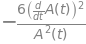

In [11]:
sp.simplify(S('^a,^b,^c')*T('_a,_b,_c'))

In [12]:
Tfun = sp.Function('T')(t) 
F = sp.Function('F')(Tfun) 
f = sp.Function('f')(Tfun)
sp.diff(f,t)
fT=sp.diff(f,Tfun)
fTT=sp.diff(f,Tfun,2)
T
Tfun 
T,Tfun

(T tensor defined, T(t))

In [13]:
LHS = pt.ten('LHS',2)
value = (det_e**(-1)*e('_mu,^i')*pt.D(det_e*e('_i,^alpha')*S('_alpha,^nu,^rho'),'_rho') + S('^nu,^lambda,_alpha')*T('^alpha,_lambda,_mu')*(fT)) + S('^nu,^rho,_mu')*pt.D(Tfun,'_rho')*fTT + sp.Rational(1,4)*KD('^nu,_mu')*(f)
LHS.assign(value,'^nu,_mu')
LHS.simplify()
LHS.display("^,_",aslist=True)

Elements assigned correctly to the ^nu,_mu components


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
LHS2 = pt.ten('LHS2',2)
value = (det_e**(-1)*pt.D(det_e*S('_i,^mu,^nu'),'_mu') - e('^lemda,_i')*S('_roh,^nu,^mu')*T('^roh,_mu,_lemda'))*(fT) + S('_i,^mu,^nu')*pt.D(Tfun,'_mu')*fTT + sp.Rational(1,4)*e('^nu,_i')*(f)
LHS2.assign(value,'_i,^nu')
LHS2.simplify()
LHS2.expand()
LHS2.display("_,^",aslist=True)

Elements assigned correctly to the _i,^nu components


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
LHS2 = pt.ten('LHS2',2)
value = (det_e**(-1)*pt.D(det_e*S('_i,^mu,^nu'),'_mu') - e('^lemda,_i')*S('_roh,^nu,^mu')*T('^roh,_mu,_lemda'))
LHS2.assign(value,'_i,^nu')
LHS2.simplify()
LHS2.expand()
LHS2.display("_,^",aslist=True)

Elements assigned correctly to the _i,^nu components


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>